# QUESTIONS
1. Understanding what content is available in different countries
2. Identifying similar content by matching text-based features
3. Network analysis of Actors / Directors and find interesting insights
4. Does Netflix has more focus on TV Shows than movies in recent years.

In [64]:
#importing netflix csv file
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [65]:
# data cleaning process
df.dropna(subset='director', inplace=True)
df.dropna(subset='cast', inplace=True)
df.dropna(subset='country', inplace=True)

# Question 3

Network analysis of Actors / Directors and find interesting insights

In [66]:
#showing the relationship between directors and titles(movies)
#count the number of titles with respect to directors
d=df.groupby(['director'])['title'].count()
#covert to dataframe
d=d.to_frame()
d

,title
director,
A. L. Vijay,2
A. Raajdheep,1
A. Salaam,1
A.R. Murugadoss,1
Aadish Keluskar,1
...,...
Çagan Irmak,1
Ísold Uggadóttir,1
Óskar Thór Axelsson,1


In [67]:
#looping through the column title and take the entries that are greater that 10
#if enteries is less than or equal 10 append none 
#append the entries to the list new
new=[]
for i in d['title']:
    if i<=10:
        new.append(None)
    else:
        new.append(i)
new
#create a colume title count and store the list new
d['title_count'] = new
d
      

,title,title_count
director,,
A. L. Vijay,2,NaN
A. Raajdheep,1,NaN
A. Salaam,1,NaN
A.R. Murugadoss,1,NaN
Aadish Keluskar,1,NaN
...,...,...
Çagan Irmak,1,NaN
Ísold Uggadóttir,1,NaN
Óskar Thór Axelsson,1,NaN


In [68]:
#drop all null entries in title count
d.dropna(subset='title_count', inplace=True)
#d

In [69]:
#drop the column title count after wards
d=d.drop(['title_count'], axis=1)
d

,title
director,
Cathy Garcia-Molina,13
Jay Chapman,12
Jay Karas,14
Marcus Raboy,15
Martin Scorsese,12
"Raúl Campos, Jan Suter",18
Steven Spielberg,11
Youssef Chahine,12


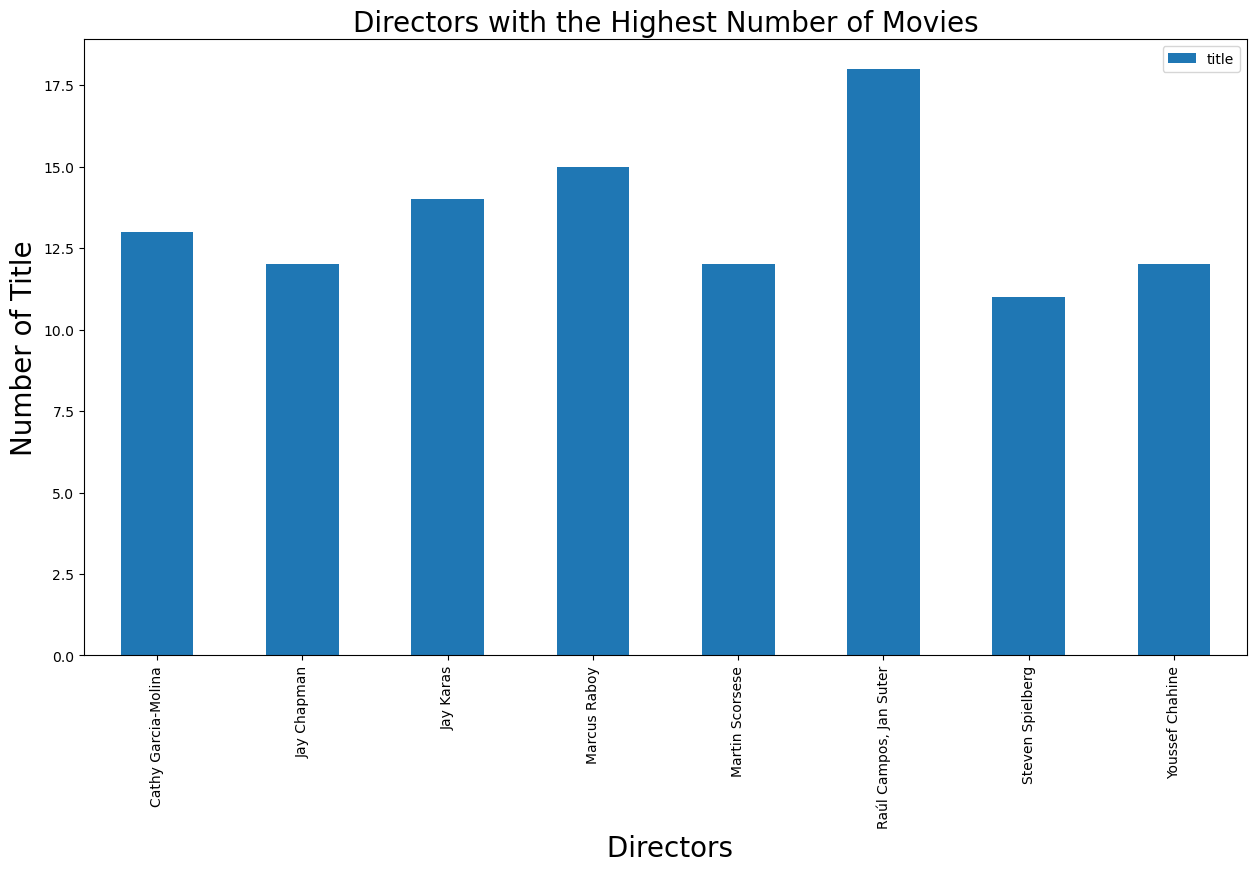

In [70]:
#plot a bar chat between Directors and number of titles
import matplotlib.pyplot as plt
d.plot(kind='bar')
plt.xlabel(" Directors", size= 20)
plt.ylabel("Number of Title", size= 20)
plt.title("Directors with the Highest Number of Movies", size=20)
plt.show()

# Question 1
Understanding what content is available in different countries

In [10]:
#loop through the column country
#split the item in each entry
#append according to the index listed
#store in list m
m=[]
for i in df['country']:
    part = i.split(", ")
    if len(part)>5:
        m.append(part[5])
    elif len(part)>5:
        m.append(part[4])
    elif len(part)>4:
        m.append(part[3])
    elif len(part)>3:
        m.append(part[2])
    elif len(part)>2:
        m.append(part[1])
    elif len(part)>1:
        m.append(part[1])
    elif len(part)>0:
        m.append(part[0])
#create a new column and store m
df['new_country']= m
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_country
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Ethiopia
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,United Kingdom
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,United States
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Czech Republic
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,Jordan
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",United States
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,United States
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States


In [11]:
#create a dataframe that contains the countries and the contents
city=df.groupby(['new_country'])['listed_in'].sum()
city1=city.to_frame()
city1.reset_index(inplace=True)
city1

,new_country,listed_in
0,Albania,"Dramas, International Movies"
1,Algeria,"Dramas, International MoviesClassic Movies, Dr..."
2,Angola,"Action & Adventure, International Movies"
3,Argentina,"Comedies, Cult Movies, International MoviesSta..."
4,Australia,"Dramas, Romantic MoviesChildren & Family Movie..."
...,...,...
89,Uruguay,"Documentaries, International Movies, Music & M..."
90,Venezuela,"Dramas, International Movies, ThrillersDocumen..."
91,Vietnam,"Dramas, International Movies, Romantic MoviesD..."
92,West Germany,"Horror Movies, International Movies, Thrillers"


In [12]:
#converting the dataframe to a csv
city1.to_csv("content in diffrent countries.csv")

In [13]:
#count the number of listed in with respect to countries
cities = df.groupby(['new_country'])['listed_in'].count()
cities

new_country
Albania          1
Algeria          2
Angola           1
Argentina       45
Australia       50
                ..
Uruguay          3
Venezuela        2
Vietnam          7
West Germany     1
Zimbabwe         1
Name: listed_in, Length: 94, dtype: int64

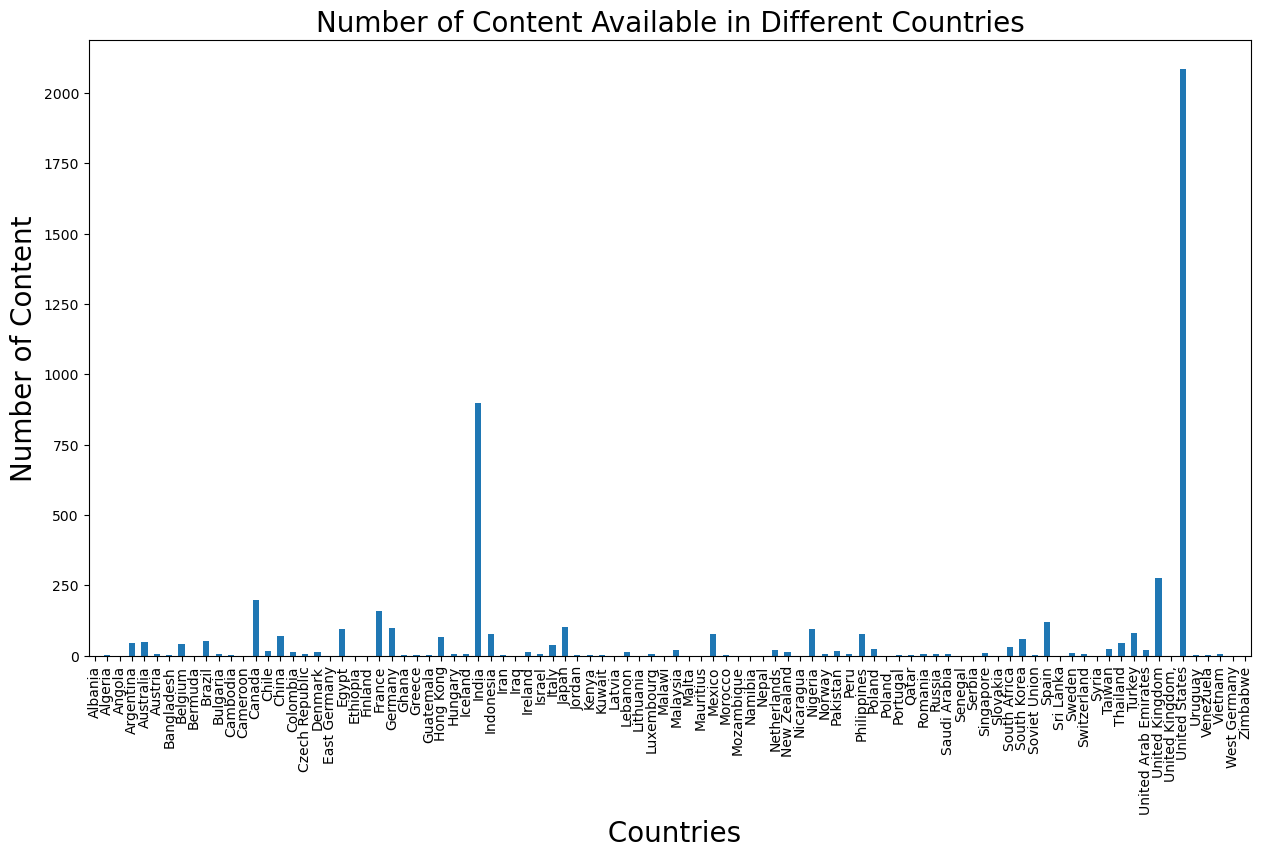

In [14]:
#ploting the number of content against countries
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =[15,8]
cities.plot(kind='bar')
plt.xlabel(" Countries", size= 20)
plt.ylabel("Number of Content", size= 20)
plt.title("Number of Content Available in Different Countries", size=20)
plt.show()

In [15]:
list_ = []

for i in df['country']:
    if "," in i:
        new_list= i.split(", ")
        for j in new_list:
            if j in list_:
                continue
            else:
                list_.append(j)
    
    
#list_
dp=pd.DataFrame(list_, columns= ['new'])
#dp

# Question 4

Does Netflix has more focus on TV Shows than movies in recent years.

In [16]:
#loop through the column date added 
#split by comma and select the index 1
#append the index 1 to the empty list n
n=[]
for i in df['date_added']:
    part = i.split(",")
    if len(part)>1:
        n.append(part[1])
#store the list n to a column year
df['year']= n
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_country,year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Ethiopia,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,United Kingdom,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,United States,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Czech Republic,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,India,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,Jordan,2016
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",United States,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,United States,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States,2020


In [17]:
#locate 2019, 2020,2021 in the column year
#this column should only contain the following years
df = df.loc[df['year'].str.contains('2019')| df['year'].str.contains('2020') | df['year'].str.contains('2021')]
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_country,year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Ethiopia,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,United Kingdom,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,United States,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Czech Republic,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,India,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,India,2019
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",United States,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,United States,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States,2020


In [18]:
#loop through the column type and store all movies in the empty list g
g=[]
for i in df['type']:
    if i == 'Movie':
        g.append(i)
    elif i != 'Movie':
        g.append(None)
#create a column movies and store the list g        
df['movie'] = g


C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_8596\2403468724.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['movie'] = g


In [19]:
#loop through the column type and store all tv shows in the empty list g
g=[]
for i in df['type']:
    if i == 'TV Show':
        g.append(i)
    elif i != 'TV Show':
        g.append(None)
#create a column tv shows and store the list g        
df['tv_show'] = g


C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_8596\897504622.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tv_show'] = g


In [20]:
movie_tvshow=df.groupby(['year'])['movie', 'tv_show'].count()
movie_tvshow

C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_8596\1976451515.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  movie_tvshow=df.groupby(['year'])['movie', 'tv_show'].count()


,movie,tv_show
year,,
2019,1236,29
2020,1151,43
2021,729,26


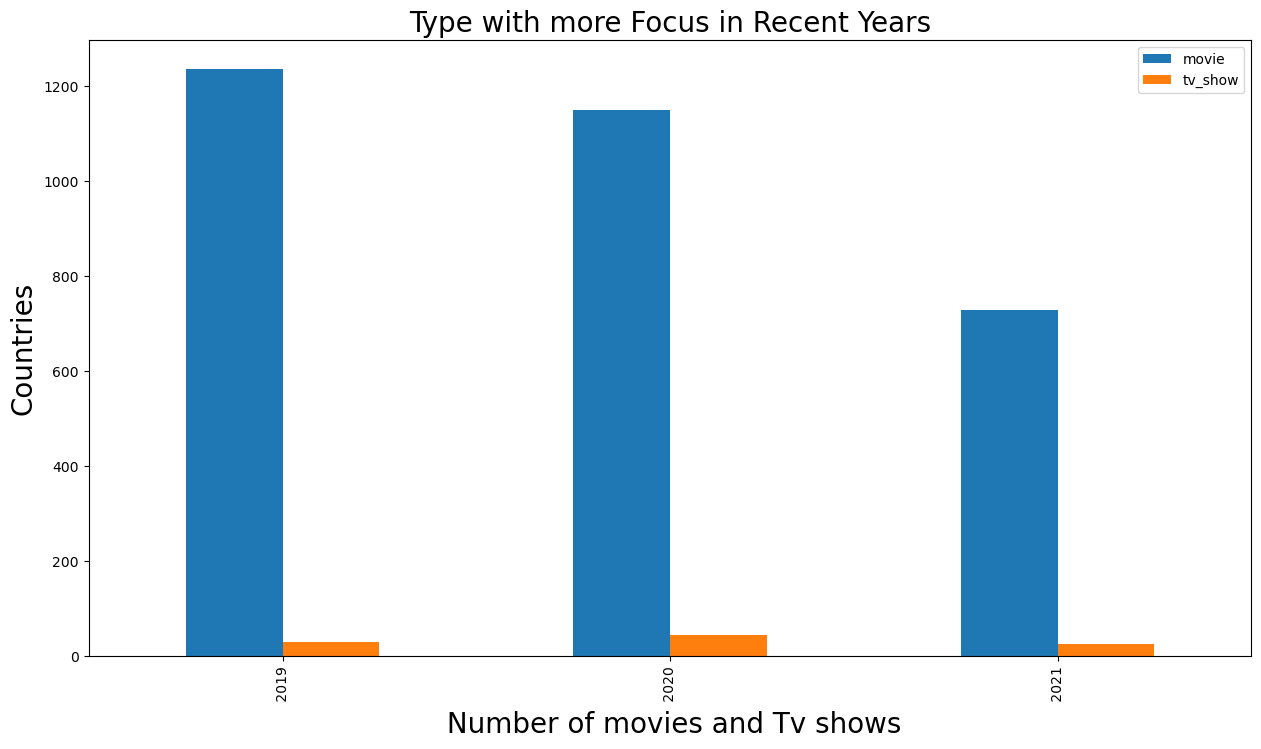

In [25]:
movie_tvshow.plot(kind='bar')
plt.xlabel(" Number of movies and Tv shows", size= 20)
plt.ylabel("Countries", size= 20)
plt.title("Type with more Focus in Recent Years", size=20)
plt.show()